# Capstone 2: Biodiversity Project

# Introduction
You are a biodiversity analyst working for the National Parks Service.  You're going to help them analyze some data about species at various national parks.

Note: The data that you'll be working with for this project is *inspired* by real data, but is mostly fictional.

# Step 1
Import the modules that you'll be using in this assignment:
- `from matplotlib import pyplot as plt`
- `import pandas as pd`

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# Step 2
You have been given two CSV files. `species_info.csv` with data about different species in our National Parks, including:
- The scientific name of each species
- The common names of each species
- The species conservation status

Load the dataset and inspect it:
- Load `species_info.csv` into a DataFrame called `species`

In [20]:
species = pd.read_csv('species_info.csv')
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


Inspect each DataFrame using `.head()`.

In [21]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


# Step 3
Let's start by learning a bit more about our data.  Answer each of the following questions.

How many different species are in the `species` DataFrame?

In [22]:
species.scientific_name.nunique()

5541

What are the different values of `category` in `species`?

In [23]:
#Species Information - group by category
category = species.groupby('category')\
    .scientific_name.nunique().reset_index()\
    .sort_values(by='scientific_name', ascending=False)
category

,category,scientific_name
6,Vascular Plant,4262
1,Bird,488
4,Nonvascular Plant,333
3,Mammal,176
2,Fish,125
0,Amphibian,79
5,Reptile,78


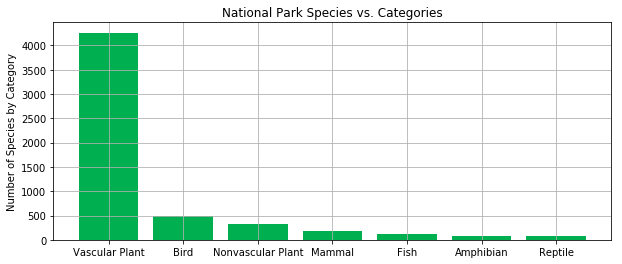

In [24]:
#Species Information - Graph "National Park Species vs. Categories"
plt.figure(figsize=(10, 4))
ax = plt.subplot()
bar_heights=category['scientific_name']
labels=category['category']
c='#00B050'
graph=ax.bar(range(len(bar_heights)),bar_heights, color=c)
plt.grid(True)
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
plt.title('National Park Species vs. Categories')
plt.ylabel('Number of Species by Category')
plt.savefig('categories.png')
plt.show()

What are the different values of `conservation_status`?

In [25]:
#Species Information - group by conservation status
conservation_status=species.groupby('conservation_status')\
    .scientific_name.nunique().reset_index()\
    .sort_values(by='scientific_name', ascending=False)
conservation_status

,conservation_status,scientific_name
2,Species of Concern,151
0,Endangered,15
3,Threatened,10
1,In Recovery,4


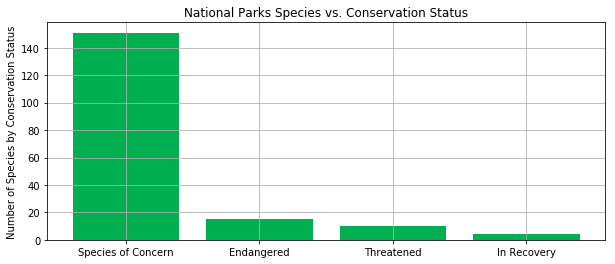

In [26]:
#Species Information - Graph "National Park Species vs. Conservation Status"
plt.figure(figsize=(10, 4))
ax = plt.subplot()
bar_heights=conservation_status['scientific_name']
labels=conservation_status['conservation_status']
c='#00B050'
plt.bar(range(len(bar_heights)),bar_heights, color=c)
plt.grid(True)
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
plt.title('National Parks Species vs. Conservation Status')
plt.ylabel('Number of Species by Conservation Status')
plt.savefig('conservation_status.png')
plt.show()

# Step 4
Let's start doing some analysis!

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currnetly neither in danger of extinction throughout all or a significant portion of its range

We'd like to count up how many species meet each of these criteria.  Use `groupby` to count how many `scientific_name` meet each of these criteria.

In [27]:
species.groupby('conservation_status').scientific_name.nunique().reset_index()

,conservation_status,scientific_name
0,Endangered,15
1,In Recovery,4
2,Species of Concern,151
3,Threatened,10


As we saw before, there are far more than 200 species in the `species` table.  Clearly, only a small number of them are categorized as needing some sort of protection.  The rest have `conservation_status` equal to `None`.  Because `groupby` does not include `None`, we will need to fill in the null values.  We can do this using `.fillna`.  We pass in however we want to fill in our `None` values as an argument.

Paste the following code and run it to see replace `None` with `No Intervention`:
```python
species.fillna('No Intervention', inplace=True)
```

In [28]:
species.fillna('No Intervention', inplace=True)

Great! Now run the same `groupby` as before to see how many species require `No Intervention`.

In [29]:
species.groupby('conservation_status').scientific_name.nunique().reset_index()

,conservation_status,scientific_name
0,Endangered,15
1,In Recovery,4
2,No Intervention,5363
3,Species of Concern,151
4,Threatened,10


Let's use `plt.bar` to create a bar chart.  First, let's sort the columns by how many species are in each categories.  We can do this using `.sort_values`.  We use the the keyword `by` to indicate which column we want to sort by.

Paste the following code and run it to create a new DataFrame called `protection_counts`, which is sorted by `scientific_name`:
```python
protection_counts = species.groupby('conservation_status')\
    .scientific_name.nunique().reset_index()\
    .sort_values(by='scientific_name')
```

In [30]:
protection_counts = species.groupby('conservation_status')\
    .scientific_name.nunique().reset_index()\
    .sort_values(by='scientific_name', ascending=False)
protection_counts

,conservation_status,scientific_name
2,No Intervention,5363
3,Species of Concern,151
0,Endangered,15
4,Threatened,10
1,In Recovery,4


# Now let's create a bar chart!
1. Start by creating a wide figure with `figsize=(10, 4)`
1. Start by creating an axes object called `ax` using `plt.subplot`.
2. Create a bar chart whose heights are equal to `scientific_name` column of `protection_counts`.
3. Create an x-tick for each of the bars.
4. Label each x-tick with the label from `conservation_status` in `protection_counts`
5. Label the y-axis `Number of Species`
6. Title the graph `Conservation Status by Species`
7. Plot the grap using `plt.show()`

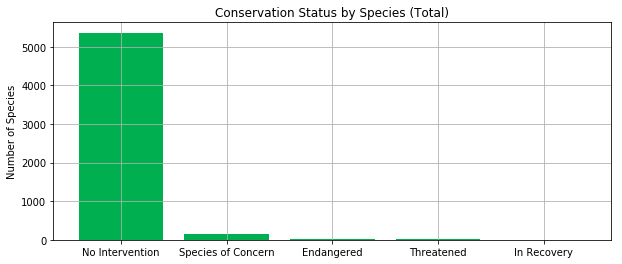

In [31]:
#Species Categories of Most Concern - Graph "Conservation Status by Species (Total)"
plt.figure(figsize=(10, 4))
ax = plt.subplot()
bar_heights=protection_counts['scientific_name']
labels=protection_counts['conservation_status']
c='#00B050'
plt.bar(range(len(bar_heights)),bar_heights, color=c)
plt.grid(True)
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
plt.title('Conservation Status by Species (Total)')
plt.ylabel('Number of Species')
plt.savefig('conservation_status_total.png')
plt.show()

# Step 4
Are certain types of species more likely to be endangered?

Let's create a new column in `species` called `is_protected`, which is `True` if `conservation_status` is not equal to `No Intervention`, and `False` otherwise.

In [32]:
species['is_protected']=species.conservation_status.apply(lambda x: True if x != 'No Intervention' else False)

Let's group the `species` data frame by the `category` and `is_protected` columns and count the unique `scientific_name`s in each grouping.

Save your results to `category_counts`.

In [33]:
category_counts = species.groupby(['category','is_protected'])\
                 .scientific_name.nunique().reset_index().sort_values(by='scientific_name')

Examine `category_counts` using `head()`.

In [34]:
category_counts.head()

,category,is_protected,scientific_name
9,Nonvascular Plant,True,5
11,Reptile,True,5
1,Amphibian,True,7
5,Fish,True,11
7,Mammal,True,30


It's going to be easier to view this data if we pivot it.  Using `pivot`, rearange `category_counts` so that:
- `columns` is `is_protected`
- `index` is `category`
- `values` is `scientific_name`

Save your pivoted data to `category_pivot`. Remember to `reset_index()` at the end.

In [35]:
category_pivot = category_counts.pivot(columns = 'is_protected', index = 'category', values = 'scientific_name').reset_index()

Examine `category_pivot`.

In [36]:
category_pivot

is_protected,category,False,True
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Use the `.columns` property to  rename the categories `True` and `False` to something more description:
- Leave `category` as `category`
- Rename `False` to `not_protected`
- Rename `True` to `protected`

In [37]:
category_pivot.rename(columns = {False:'not_protected', True: 'protected'}, inplace=True)
category_pivot

is_protected,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


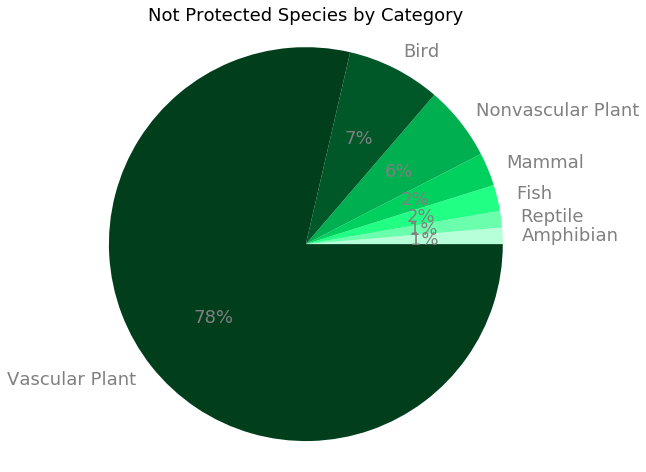

In [38]:
#Species Categories of Most Concern - Graph "Not Protected Species by Category"
category_pivot_sorted = category_pivot.sort_values(by='not_protected', ascending=True)
category_pivot_sorted

plt.figure(figsize=(10, 8))
ax = plt.subplot()
bar_heights=category_pivot_sorted['not_protected']
labels=category_pivot_sorted['category']
c = ['#B7FFD8','#69FFAD', '#21FF85','#00D05E','#00B050', '#005828','#003E1C']
plt.pie(bar_heights,labels=labels, colors=c, autopct='%d%%',textprops={'fontsize': 18, 'color':"gray"})
plt.grid(True)
plt.axis('equal')
ax.set_xticklabels(labels)
plt.title('Not Protected Species by Category',fontsize=18)
plt.savefig('category_not_protected.png')
plt.show()

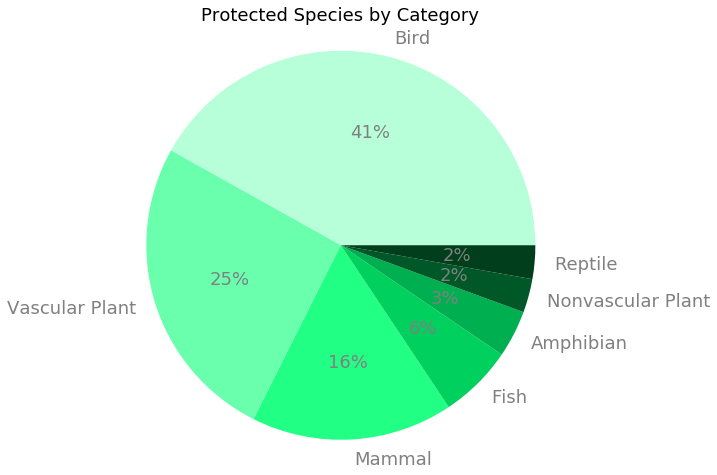

In [39]:
#Species Categories of Most Concern - Graph "Protected Species by Category"
category_pivot_sorted = category_pivot.sort_values(by='protected', ascending=False)
category_pivot_sorted

plt.figure(figsize=(10, 8))
ax = plt.subplot()
bar_heights=category_pivot_sorted['protected']
labels=category_pivot_sorted['category']
c = ['#B7FFD8','#69FFAD', '#21FF85','#00D05E','#00B050', '#005828','#003E1C']
plt.pie(bar_heights,labels=labels, colors=c, autopct='%d%%',textprops={'fontsize': 18,'color':"gray"})
plt.grid(True)
plt.axis('equal')
ax.set_xticklabels(labels)
plt.title('Protected Species by Category',fontsize=18)
plt.savefig('category_protected.png')
plt.show()

Let's create a new column of `category_pivot` called `percent_protected`, which is equal to `protected` (the number of species that are protected) divided by `protected` plus `not_protected` (the total number of species).

In [41]:
category_pivot['percent_protected'] = category_pivot['protected']/ (category_pivot['protected']+category_pivot['not_protected'])

Examine `category_pivot`.

In [42]:
category_pivot

is_protected,category,not_protected,protected,percent_protected
0,Amphibian,72,7,0.088608
1,Bird,413,75,0.153689
2,Fish,115,11,0.087302
3,Mammal,146,30,0.170455
4,Nonvascular Plant,328,5,0.015015
5,Reptile,73,5,0.064103
6,Vascular Plant,4216,46,0.010793


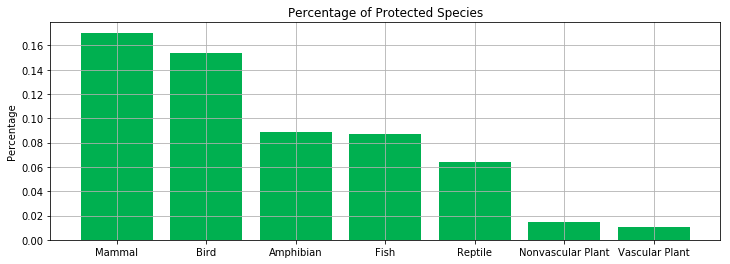

In [43]:
#Species Categories of Most Concern - Graph "Percentage of Protected Species"
category_pivot_order = category_pivot.sort_values(by='percent_protected', ascending=False)
category_pivot_order

plt.figure(figsize=(12, 4))
ax = plt.subplot()
bar_heights=category_pivot_order['percent_protected']
labels=category_pivot_order['category']
c='#00B050'
plt.bar(range(len(bar_heights)),bar_heights, color=c)
plt.grid(True)
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
plt.title('Percentage of Protected Species')
plt.ylabel('Percentage')
plt.savefig('percent_protected.png')
plt.show()

It looks like species in category `Mammal` are more likely to be endangered than species in `Bird`.  We're going to do a significance test to see if this statement is true.  Before you do the significance test, consider the following questions:
- Is the data numerical or categorical?
- How many pieces of data are you comparing?

Based on those answers, you should choose to do a *chi squared test*.  In order to run a chi squared test, we'll need to create a contingency table.  Our contingency table should look like this:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

Create a table called `contingency` and fill it in with the correct numbers

In [44]:
#Mammal vs. Bird
contingency = [[30,146],[75,413]]

In order to perform our chi square test, we'll need to import the correct function from scipy.  Past the following code and run it:
```py
from scipy.stats import chi2_contingency
```

In [45]:
from scipy.stats import chi2_contingency

Now run `chi2_contingency` with `contingency`.

In [46]:
chi2, pval, dof, expected = chi2_contingency(contingency)
print(pval)

0.6875948096661336


It looks like this difference isn't significant!

Let's test another.  Is the difference between `Reptile` and `Mammal` significant?

In [47]:
#Mammal vs. Reptile
contingency = [[30,146],[5,73]]
chi2, pval, dof, expected = chi2_contingency(contingency)
print(pval)

0.03835559022969898


Yes! It looks like there is a significant difference between `Reptile` and `Mammal`!

In [33]:
#Mammal vs. Nonvascular Plant
contingency = [[30,146],[5,328]]
chi2, pval, dof, expected = chi2_contingency(contingency)
print(pval)

1.481868915759314e-10


# Step 5

Conservationists have been recording sightings of different species at several national parks for the past 7 days.  They've saved sent you their observations in a file called `observations.csv`.  Load `observations.csv` into a variable called `observations`, then use `head` to view the data.

In [49]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


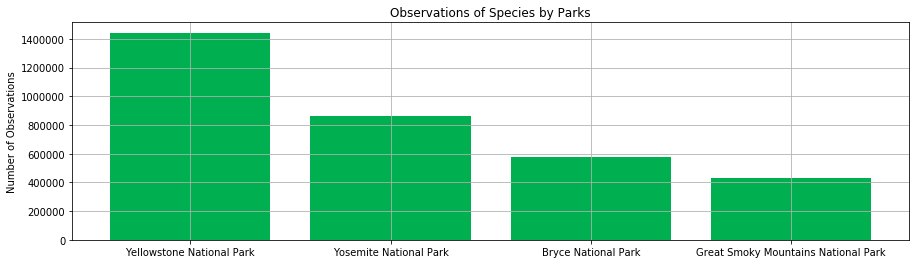

In [50]:
#Species Sightings in National Parks - Graph "Observations of Species by Parks"
observations_count_park=observations.groupby('park_name')\
    .observations.sum().reset_index()\
    .sort_values(by='observations', ascending=False)

plt.figure(figsize=(15, 4))
ax = plt.subplot()
bar_heights=observations_count_park['observations']
labels=observations_count_park['park_name']
c='#00B050'
graph=ax.bar(range(len(bar_heights)),bar_heights, color=c)
plt.grid(True)
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
plt.title('Observations of Species by Parks')
plt.ylabel('Number of Observations')
plt.savefig('parks_observations.png')
plt.show()

In [54]:
#10 most observed species:
observations_count_species=observations.groupby('scientific_name')\
    .observations.sum().reset_index()\
    .sort_values(by='observations', ascending=False).head(10)
observations_count_species

,scientific_name,observations
4993,Streptopelia decaocto,1785
2452,Holcus lanatus,1780
1103,Castor canadensis,1725
2555,Hypochaeris radicata,1720
4179,Puma concolor,1711
4109,Procyon lotor,1692
1359,Columba livia,1653
3322,Myotis lucifugus,1547
583,Bidens tripartita,1296
3494,Oxalis dillenii,1276


In [55]:
#Treat Duplicates
unique_species_conservation = species.groupby(['category','scientific_name','conservation_status'])\
    .common_names.nunique().reset_index()\
    .sort_values(by='common_names', ascending=False)
unique_species_conservation.head()

,category,scientific_name,conservation_status,common_names
214,Bird,Columba livia,No Intervention,3
768,Mammal,Myotis lucifugus,Species of Concern,3
3190,Vascular Plant,Holcus lanatus,No Intervention,3
808,Mammal,Procyon lotor,No Intervention,3
809,Mammal,Puma concolor,No Intervention,3


In [57]:
#Treat Duplicates
unique_observations = observations.groupby(['scientific_name','park_name'])\
    .observations.sum().reset_index()\
    .sort_values(by='observations', ascending=False)
unique_observations.head()

,scientific_name,park_name,observations
9810,Holcus lanatus,Yellowstone National Park,805
19974,Streptopelia decaocto,Yellowstone National Park,771
16718,Puma concolor,Yellowstone National Park,753
16438,Procyon lotor,Yellowstone National Park,745
10222,Hypochaeris radicata,Yellowstone National Park,726


In [58]:
species_observations_conservation = unique_species_conservation.merge(unique_observations)
species_observations_conservation.head()

,category,scientific_name,conservation_status,common_names,park_name,observations
0,Bird,Columba livia,No Intervention,3,Yellowstone National Park,722
1,Bird,Columba livia,No Intervention,3,Yosemite National Park,423
2,Bird,Columba livia,No Intervention,3,Bryce National Park,339
3,Bird,Columba livia,No Intervention,3,Great Smoky Mountains National Park,169
4,Mammal,Myotis lucifugus,Species of Concern,3,Yellowstone National Park,679


In [59]:
observations_count_conservation=species_observations_conservation.groupby('conservation_status')\
    .observations.sum().reset_index()\
    .sort_values(by='observations', ascending=False)
observations_count_conservation

,conservation_status,observations
2,No Intervention,3225444
3,Species of Concern,82579
4,Threatened,3339
0,Endangered,2798
1,In Recovery,2107


In [60]:
parks_observations_conservation=species_observations_conservation.groupby(['park_name','conservation_status'])\
    .observations.sum().reset_index()\
    .sort_values(by='observations', ascending=False)
parks_observations_conservation

,park_name,conservation_status,observations
12,Yellowstone National Park,No Intervention,1404899
17,Yosemite National Park,No Intervention,839976
2,Bryce National Park,No Intervention,559926
7,Great Smoky Mountains National Park,No Intervention,420643
13,Yellowstone National Park,Species of Concern,35789
18,Yosemite National Park,Species of Concern,21551
3,Bryce National Park,Species of Concern,14925
8,Great Smoky Mountains National Park,Species of Concern,10314
14,Yellowstone National Park,Threatened,1459
10,Yellowstone National Park,Endangered,1228


In [76]:
lab = ['Yellowstone National Park','Yosemite National Park','Bryce National Park','Great Smoky Mountains National Park']

plt.figure(figsize=(15, 4))
x= range(4)
C = np.add(list_species_concern,list_endangered)
D = np.add(C,list_threatened)

plt.bar(x,list_species_concern, color='#B7FFD8')
plt.bar(x,list_endangered, bottom = list_species_concern, color='#21FF85')
plt.bar(x,list_threatened, bottom = C, color='#00B050')
plt.bar(x,list_in_recovery, bottom = D, color='#003E1C')

ax = plt.subplot()
plt.grid(True)
ax.set_xticks(range(len(lab)))
ax.set_xticklabels(lab)
plt.title('Observation of Protected Species by Parks')
plt.ylabel('Number of Observations')
plt.legend(['Species of Concern','Endangered','Threatened','In Recovery'])
plt.savefig('parks_observations_conservation.png')
plt.show()

,park_name,conservation_status,observations
11,Yellowstone National Park,In Recovery,889
16,Yosemite National Park,In Recovery,582
1,Bryce National Park,In Recovery,388
6,Great Smoky Mountains National Park,In Recovery,248


In [ ]:
#Species Sightings in National Parks - Graph "Observation of Protected Species by Parks"

lab = ['Yellowstone National Park','Yosemite National Park','Bryce National Park','Great Smoky Mountains National Park']
species_concern = [35789,21551,14925,10314]
endangered = [1228,747,489,334]
threatened = [1459,849,591,440]
in_recovery = [889,582,388,248]

plt.figure(figsize=(15, 4))
x= range(4)
C = np.add(species_concern,endangered)
D = np.add(C,threatened)
plt.bar(x,species_concern, color='#B7FFD8')
plt.bar(x,endangered, bottom = species_concern, color='#21FF85')
plt.bar(x,threatened, bottom = C, color='#00B050')
plt.bar(x,in_recovery, bottom = D, color='#003E1C')

ax = plt.subplot()
plt.grid(True)
ax.set_xticks(range(len(lab)))
ax.set_xticklabels(lab)
plt.title('Observation of Protected Species by Parks')
plt.ylabel('Number of Observations')
plt.legend(['Species of Concern','Endangered','Threatened','In Recovery'])
plt.savefig('parks_observations_conservation.png')
plt.show()

Some scientists are studying the number of sheep sightings at different national parks.  There are several different scientific names for different types of sheep.  We'd like to know which rows of `species` are referring to sheep.  Notice that the following code will tell us whether or not a word occurs in a string:

In [83]:
# Does "Sheep" occur in this string?
str1 = 'This string contains Sheep'
'Sheep' in str1

True

In [84]:
# Does "Sheep" occur in this string?
str2 = 'This string contains Cows'
'Sheep' in str2

False

Use `apply` and a `lambda` function to create a new column in `species` called `is_sheep` which is `True` if the `common_names` contains `'Sheep'`, and `False` otherwise.

In [85]:
species['is_sheep'] = species.common_names.apply(lambda x: True if 'Sheep' in x else False)
species.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False


Select the rows of `species` where `is_sheep` is `True` and examine the results.

In [86]:
species[species.is_sheep==True]

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
1139,Vascular Plant,Rumex acetosella,"Sheep Sorrel, Sheep Sorrell",No Intervention,False,True
2233,Vascular Plant,Festuca filiformis,Fineleaf Sheep Fescue,No Intervention,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
3758,Vascular Plant,Rumex acetosella,"Common Sheep Sorrel, Field Sorrel, Red Sorrel,...",No Intervention,False,True
3761,Vascular Plant,Rumex paucifolius,"Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock",No Intervention,False,True
4091,Vascular Plant,Carex illota,"Sheep Sedge, Smallhead Sedge",No Intervention,False,True
4383,Vascular Plant,Potentilla ovina var. ovina,Sheep Cinquefoil,No Intervention,False,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


Many of the results are actually plants.  Select the rows of `species` where `is_sheep` is `True` and `category` is `Mammal`.  Save the results to the variable `sheep_species`.

In [87]:
sheep_species = species[(species.is_sheep==True) & (species.category=='Mammal')]
sheep_species

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


Now merge `sheep_species` with `observations` to get a DataFrame with observations of sheep.  Save this DataFrame as `sheep_observations`.

In [89]:
sheep_observations = sheep_species.merge(observations)
sheep_observations.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep,park_name,observations
0,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Yosemite National Park,126
1,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Great Smoky Mountains National Park,76
2,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Bryce National Park,119
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Yellowstone National Park,221
4,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True,Yellowstone National Park,219


How many total sheep observations (across all three species) were made at each national park?  Use `groupby` to get the `sum` of `observations` for each `park_name`.  Save your answer to `obs_by_park`.

This is the total number of sheep observed in each park over the past 7 days.

In [90]:
obs_by_park = sheep_observations.groupby('park_name').observations.sum().reset_index().sort_values(by='observations', ascending=False)
obs_by_park

,park_name,observations
2,Yellowstone National Park,507
3,Yosemite National Park,282
0,Bryce National Park,250
1,Great Smoky Mountains National Park,149


Create a bar chart showing the different number of observations per week at each park.

1. Start by creating a wide figure with `figsize=(16, 4)`
1. Start by creating an axes object called `ax` using `plt.subplot`.
2. Create a bar chart whose heights are equal to `observations` column of `obs_by_park`.
3. Create an x-tick for each of the bars.
4. Label each x-tick with the label from `park_name` in `obs_by_park`
5. Label the y-axis `Number of Observations`
6. Title the graph `Observations of Sheep per Week`
7. Plot the grap using `plt.show()`

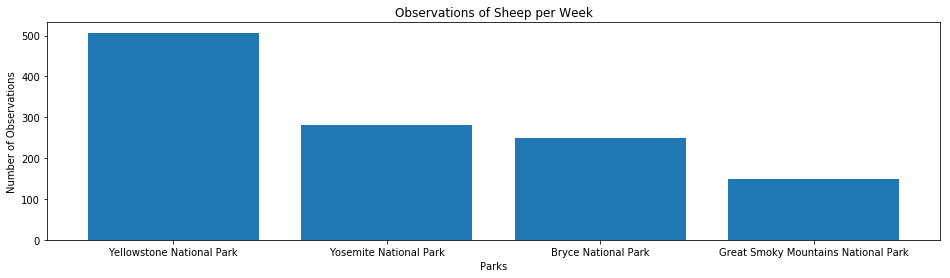

In [91]:
plt.figure(figsize=(16, 4))
ax = plt.subplot()

bar_heights=obs_by_park['observations']
labels=obs_by_park['park_name']

plt.bar(range(len(bar_heights)),bar_heights)
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
plt.title('Observations of Sheep per Week')
plt.ylabel('Number of Observations')
plt.xlabel('Parks')

plt.show()

Our scientists know that 15% of sheep at Bryce National Park have foot and mouth disease.  Park rangers at Yellowstone National Park have been running a program to reduce the rate of foot and mouth disease at that park.  The scientists want to test whether or not this program is working.  They want to be able to detect reductions of at least 5 percentage points.  For instance, if 10% of sheep in Yellowstone have foot and mouth disease, they'd like to be able to know this, with confidence.

Use <a href="https://s3.amazonaws.com/codecademy-content/courses/learn-hypothesis-testing/a_b_sample_size/index.html">Codecademy's sample size calculator</a> to calculate the number of sheep that they would need to observe from each park.  Use the default level of significance (90%).

Remember that "Minimum Detectable Effect" is a percent of the baseline.

In [92]:
minimum_detectable_effect = 100 * 0.05 / 0.15
minimum_detectable_effect

33.333333333333336

In [94]:
baseline = 15
sample_size_per_variant = 870

How many weeks would you need to observe sheep at Bryce National Park in order to observe enough sheep?  How many weeks would you need to observe at Yellowstone National Park to observe enough sheep?

In [95]:
bryce = 870 / 250.
yellowstone = 810 / 507.

# Approximately 3.5 weeks at Bryce and 1.5 weeks at Yellowstone.

In [ ]:
#Sightings of Endangered Mammals

In [97]:
mammal_endargered = species[(species.conservation_status != 'No Intervention')&(species.category == 'Mammal')].sort_values(by=['conservation_status','scientific_name']).reset_index()
mammal_endargered.head()

,index,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
0,8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
1,4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered,True,False
2,9,Mammal,Canis rufus,Red Wolf,Endangered,True,False
3,72,Mammal,Glaucomys sabrinus coloratus,"Carolina Northern Flying Squirrel, Northern Fl...",Endangered,True,False
4,34,Mammal,Myotis grisescens,Gray Myotis,Endangered,True,False


In [102]:
common_names = mammal_endargered.groupby(['scientific_name','common_names']).index.nunique().reset_index().sort_values(by='scientific_name')
common_names.head(10)

,scientific_name,common_names,index
0,Antrozous pallidus,"Pallid Bat, Pallid Bat",1
1,Aplodontia rufa californica,Sierra Nevada Mountain Beaver,1
2,Bassariscus astutus,Ringtail,1
3,Canis latrans,Coyote,1
4,Canis lupus,Gray Wolf,1
5,Canis lupus,"Gray Wolf, Wolf",2
6,Canis rufus,Red Wolf,1
8,Eptesicus fuscus,"Big Brown Bat, Big Brown Bat",1
7,Eptesicus fuscus,Big Brown Bat,1
9,Euderma maculatum,"Spotted Bat, Spotted Bat",1


In [101]:
#Treat Duplicates
common_names_dedup = \
              common_names[(common_names.common_names != 'Gray Wolf, Wolf') & \
             (common_names.common_names !='Big Brown Bat, Big Brown Bat') & \
             (common_names.common_names !='Silver-Haired Bat, Silver-Haired Bat') & \
             (common_names.common_names !='California Myotis, California Myotis, Californian Myotis') & \
             (common_names.common_names !='Little Brown Bat, Little Brown Myotis, Little Brown Myotis') & \
             (common_names.common_names !='Little Brown Bat, Little Brown Myotis') & \
             (common_names.common_names !='American Badger, Badger')].reset_index()
common_names_dedup.head(10)

,level_0,scientific_name,common_names,index
0,0,Antrozous pallidus,"Pallid Bat, Pallid Bat",1
1,1,Aplodontia rufa californica,Sierra Nevada Mountain Beaver,1
2,2,Bassariscus astutus,Ringtail,1
3,3,Canis latrans,Coyote,1
4,4,Canis lupus,Gray Wolf,1
5,6,Canis rufus,Red Wolf,1
6,7,Eptesicus fuscus,Big Brown Bat,1
7,9,Euderma maculatum,"Spotted Bat, Spotted Bat",1
8,10,Glaucomys sabrinus coloratus,"Carolina Northern Flying Squirrel, Northern Fl...",1
9,11,Lasionycteris noctivagans,Silver-Haired Bat,1


In [105]:
category_counts = mammal_endargered.groupby(['scientific_name','is_protected']).index.nunique().reset_index().sort_values(by='scientific_name')
species_observations = category_counts.merge(observations)
species_observations.to_csv('species_observations.csv',mode='a', header=True)

In [107]:
species_observations_cnames = pd.merge(species_observations,common_names_dedup,left_on='scientific_name',right_on='scientific_name').sort_values(by=['observations'],ascending=False).reset_index()
species_observations_cnames.to_csv('species_observations_cnames.csv',mode='a', header=True)
species_observations_drop = species_observations_cnames.drop(columns=['level_0','index','index_x','index_y','is_protected'])

In [114]:
#Protected Mammal Species Observed
observations_count_parks=species_observations.groupby('park_name')\
    .observations.sum().reset_index()\
    .sort_values(by='observations', ascending=False)
observations_count_parks

,park_name,observations
2,Yellowstone National Park,7220
3,Yosemite National Park,4224
0,Bryce National Park,3037
1,Great Smoky Mountains National Park,1968


In [115]:
#Total Mammal Species Observed
mammal_total = species[(species.category == 'Mammal')].sort_values(by=['conservation_status','scientific_name']).reset_index()
category_counts_total = mammal_total.groupby(['scientific_name','is_protected'])\
                        .index.nunique().reset_index().sort_values(by='scientific_name')
species_observations_total = category_counts_total.merge(observations)

observations_count_parks_total=species_observations_total.groupby('park_name')\
    .observations.sum().reset_index()\
    .sort_values(by='observations', ascending=False)
observations_count_parks_total

,park_name,observations
2,Yellowstone National Park,50795
3,Yosemite National Park,30339
0,Bryce National Park,20550
1,Great Smoky Mountains National Park,15012


In [127]:
#Percentage of Protected Mammal Species Observed
observations_count_parks['percent_protected'] = observations_count_parks.observations / observations_count_parks_total.observations
parks_obs_mammal_sort = observations_count_parks.sort_values(by='percent_protected', ascending=False)
parks_obs_mammal_sort

,park_name,observations,percent_protected
0,Bryce National Park,3037,0.147786
2,Yellowstone National Park,7220,0.142140
3,Yosemite National Park,4224,0.139227
1,Great Smoky Mountains National Park,1968,0.131095


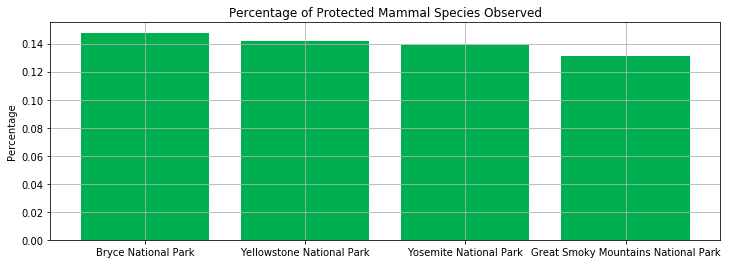

In [128]:
#Sightings of Endangered Mammals - Graph Percentage of Protected Mammal Species Observed

plt.figure(figsize=(12, 4))
ax = plt.subplot()
bar_heights=parks_obs_mammal_sort['percent_protected']
labels=parks_obs_mammal_sort['park_name']
c='#00B050'
plt.bar(range(len(bar_heights)),bar_heights, color=c)
plt.grid(True)
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
plt.title('Percentage of Protected Mammal Species Observed')
plt.ylabel('Percentage')
#ax.set_ylim([0.05,0.15])
plt.savefig('protected_mammal_observed.png')
plt.show()

In [130]:
#Bryce National Park vs. General Average
contingency = [[3037, 17513],
              [16449, 100247]]
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(contingency)
print(pval)

0.010000454540420428


In [129]:
#Bryce National Park vs. Yellowstone National Park
contingency = [[3037, 17513],
              [7220, 43575]]
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(contingency)
print(pval)

0.05303046273626695


In [109]:
#The 5 most sighted species in Bryce National Park
species_observations[species_observations.park_name=='Bryce National Park'].\
merge(species_observations_drop).sort_values(by=['observations'],ascending=False).reset_index().head()

,level_0,scientific_name,is_protected,index,park_name,observations,common_names
0,16,Myotis austroriparius,True,1,Bryce National Park,152,"Mississippi Myotis, Southeastern Myotis"
1,18,Myotis californicus,True,2,Bryce National Park,140,California Myotis
2,13,Lasionycteris noctivagans,True,2,Bryce National Park,128,Silver-Haired Bat
3,34,Sylvilagus bachmani,True,1,Bryce National Park,118,Brush Rabbit
4,14,Lasiurus blossevillii,True,1,Bryce National Park,113,Western Red Bat
